# Qubits - Exercises

The fundamental units of information in quantum computing are called qubits (quantum bits). Similar to classical bits, qubits can be found in states 0 and 1, but they can also exist in linear combinations of both.

In the standard notation for quantum information, known as Dirac notation, the quantum 0 and 1 states are represented as $\ket{0}$ and $\ket{1}$, where the symbol $\ket{\ }$ denotes a quantum state instead of a classical state. The states $\ket{0}$ and $\ket{1}$, also called computational states, represent a classical bit. For a general quantum state, we can write:

$$
|\psi\rangle = \begin{bmatrix}
    \alpha \\
    \beta \\
\end{bmatrix}.
$$

In other words, a ket is just a column vector, exactly like a classical probability vector. Instead of putting an arrow over the name of the variable to express that it is a vector, we use the ket to say that it is a column vector that represents a quantum state.

The key difference between classical probability distributions and quantum states is the normalization constraint. In quantum states, the square sum of their absolute values adds up to 1:

$$
\sqrt{|\alpha|^2 + |\beta|^2} = 1,
$$

where the components of the quantum state vector, which we call *probability amplitudes*, are complex valued.


Let's start by creating and visualizing the basis state $\ket{0}$ using `qiskit`. The following code creates a quantum circuit with 1 qubit, which is automatically initialized to the $\ket{0}$ state. We then retrieve the statevector and plot it in the bloch sphere.

In [ ]:
%pip install ingenii-quantum==0.1.0


In [ ]:

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from ingenii_quantum.visualizer import QuantumVisualizer
from ingenii_quantum.exercises import *
import numpy as np



### Build quantum circuit

In [4]:
qc = QuantumCircuit(1)


### Get statevector


In [5]:

vector = Statevector(qc)
visualizer = QuantumVisualizer(qc)
print('Statevector: ', np.array(vector))


Statevector:  [1.+0.j 0.+0.j]



### Plot Bloch Sphere


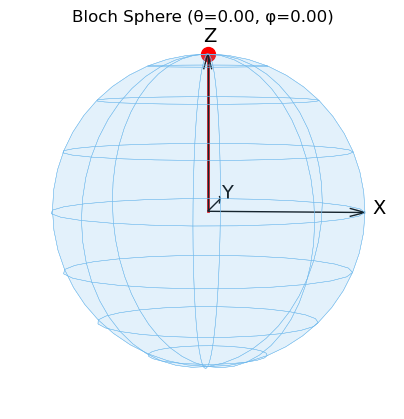

In [6]:

visualizer.draw_bloch_sphere()

We can also initialize the quantum circuit directly in a different state. In future lessons, we will learn how to use quantum gates to modify quantum states. Let's initialize the circuit in the $\ket{1}$ state, which corresponds to the vector $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$

Statevector:  [0.+0.j 1.+0.j]


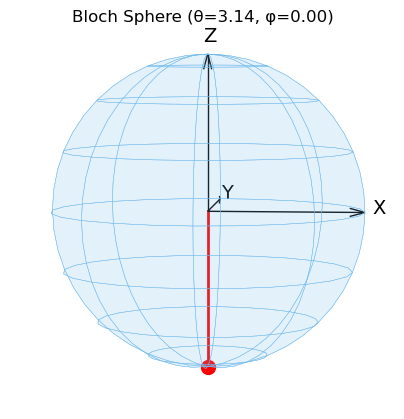

In [9]:
# Build quantum circuit
qc = QuantumCircuit(1)
# Initialize quantum circuit
initial_state = np.array([0., 1.])
qc.initialize(initial_state)
# Get quantum vector
vector = Statevector(qc)
visualizer = QuantumVisualizer(qc)

print('Statevector: ', np.array(vector))
# Plot Bloch Sphere
visualizer.draw_bloch_sphere()

### Exercise 1

Initialize the quantum circuit in the $ \ket{+} = \frac{1}{\sqrt{2}} (\ket{0} + \ket{1}) $ state.

Statevector:  [0.70710678+0.j 0.70710678+0.j]


C:\Users\Qimono\AppData\Roaming\Python\Python313\site-packages\ingenii_quantum\visualizer.py:216: UserWarning: Initialize operation not implemented for state space vizualization.
  warnings.warn('Initialize operation not implemented for state space vizualization.')


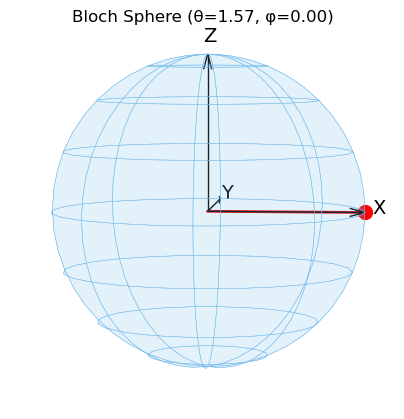

In [8]:
## Your code here
########################################################
initial_state = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
########################################################
qc = QuantumCircuit(1)
qc.initialize(initial_state)
vector = Statevector(qc)
visualizer = QuantumVisualizer(qc)

exercise2_1(vector)
print('Statevector: ', np.array(vector))
visualizer.draw_bloch_sphere()


### Exercise 2
Initialize a quantum circuit with a superposition state such that $P(\ket{0}) = 0.25$ and $P(\ket{1}) = 0.75$.

Statevector:  [0.5      +0.j 0.8660254+0.j]


C:\Users\Qimono\AppData\Roaming\Python\Python313\site-packages\ingenii_quantum\visualizer.py:216: UserWarning: Initialize operation not implemented for state space vizualization.
  warnings.warn('Initialize operation not implemented for state space vizualization.')


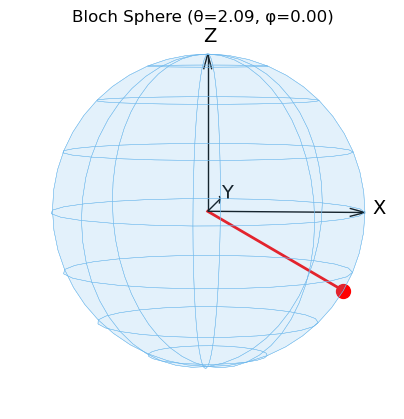

In [10]:
## Your code here
########################################################
initial_state = np.array([.5, np.sqrt(.75)])
########################################################
qc = QuantumCircuit(1)
qc.initialize(initial_state)
visualizer = QuantumVisualizer(qc)
vector = Statevector(qc)
exercise2_2(vector)

print('Statevector: ', np.array(vector))
visualizer.draw_bloch_sphere()

### Exercise 3
Initialize a quantum circuit in a superposition state such that $\phi = \pi$ and $\theta = \pi/2$.

Statevector:  [ 0.70710678+0.j -0.70710678+0.j]


C:\Users\Qimono\AppData\Roaming\Python\Python313\site-packages\ingenii_quantum\visualizer.py:216: UserWarning: Initialize operation not implemented for state space vizualization.
  warnings.warn('Initialize operation not implemented for state space vizualization.')


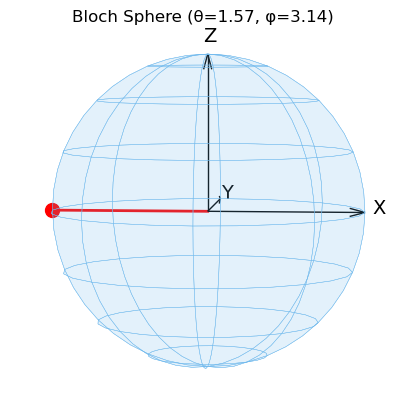

In [11]:
## Your code here
########################################################
initial_state = np.array([1./np.sqrt(2),-1./np.sqrt(2)])
########################################################
qc = QuantumCircuit(1)
qc.initialize(initial_state)
visualizer = QuantumVisualizer(qc)
vector = Statevector(qc)
exercise2_3(vector)

print('Statevector: ', np.array(vector))
visualizer.draw_bloch_sphere()

## Quantum measurement

Obtaining information about a quantum state is known as performing a measurement. When we measure a qubit, we only obtain a single bit of information. Measurement collapses superposition states, allowing us to observe only the computational basis states $\ket{0}$ or $\ket{1}$ instead of observing superpositions directly.

While the measurement outcome is random, it follows the probabilities dictated by quantum mechanics. The coefficients $|\alpha|^2$ and $|\beta|^2$ represent the probabilities of measuring $\ket{0}$ or $\ket{1}$, respectively. The normalization condition of the quantum state ensures that these probabilities add up to 1:

$$
|\alpha|^2 + |\beta|^2 = 1.
$$

In a real setting, multiple measurements of the same quantum state (preparing it anew each time) are performed to estimate these probabilities. In Qiskit, we can visualize this process using a histogram that shows the frequency of outcomes for $\ket{0}$ and $\ket{1}$ based on repeated measurements. To perform measurements, we need to add classical registers to retrieve the output of the measurements. In the following example, we include one quantum register and one classical register, and we measure a quantum circuit initialized to the $\ket{0}$ state. In this example, we use a classical simulator to perform the experiments. Notice that we set the parameter `shots=1024`, which determines the number of runs.


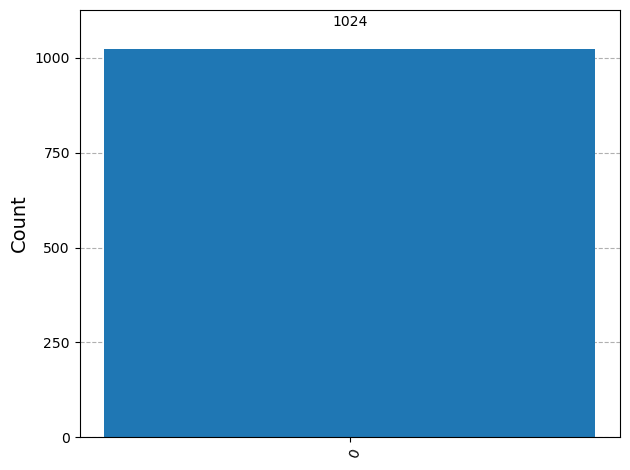

In [12]:
from qiskit import ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
# Measure qubit qubit q in register c
circuit.measure(q,c)
# Use Simulator to run the circuit
simulator = Aer.get_backend('aer_simulator')
circuit = transpile(circuit, simulator)
# Execute the circuit on the simulator
result = simulator.run(circuit, backend=simulator, shots=1024).result()
# Get the measurement counts
counts = result.get_counts(circuit)

plot_histogram(counts)

### Exercise 4

Plot the histogram of a quantum circuit initialized to the maximally entangled state of two qubits, $ \ket{\Phi} = \frac{1}{\sqrt{2}} (\ket{00} + \ket{11})$. Use `4096` shots to run the experiment.

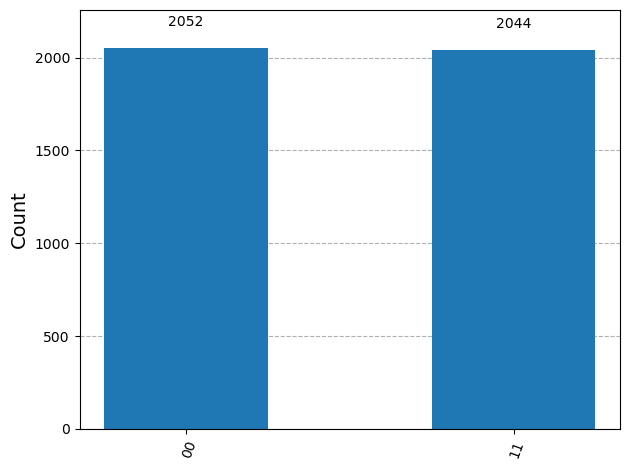

In [20]:
# Your code here
#########################################

from qiskit import ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)
initial_state = 1/np.sqrt(2)*np.array([1, 0, 0, 1])
qc.initialize(initial_state)

# Measure both qubits
qc.measure(q, c)

# Simulate the circuit
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)
result = simulator.run(qc, shots=4096).result()  

#########################################
# Get the measurement counts
counts = result.get_counts(qc)
exercise2_4(counts)
plot_histogram(counts)

## Q-sphere representation

Visualizing the state of multiple qubits can be challenging due to the high dimensionality of the quantum state space. Similar to how the Bloch Sphere aids in one-qubit visualizations, the Q-sphere provides an intuitive way to understand the distribution of a quantum state's probability amplitudes and phases for multiple-qubit systems. Recall that the general formula for a multiple-qubit state is:

$$
\ket{\Psi} = \sum_{i=0}^{2^n-1} \alpha_i \ket{i}
$$

In the Q-sphere representation:

- Each computational basis state $\ket{i}$ is shown as a point on the sphere.
- The radius of each point represents the probability of that state, given by $|\alpha_i|^2$. Larger points mean higher probabilities.
- The color of each point indicates the phase of the coefficient $\arg(\alpha_i)$, which is a complex number with a modulus of 1. As shown by the color legend, different phases are represented by different colors (e.g., +1 is gray, -1 is purple, $i$ is green, and $-i$ is yellow).
- The latitude of each point on the sphere shows the number of 0s and 1s in the state. States with the same number of 0s and 1s will be at the same latitude.

This visualization helps you see how the probabilities and phases are distributed across different states in a multi-qubit system. Let's see how to visualize a superposition state with different phases: $ \ket{\Psi} = \frac{1}{2} (i\ket{00} - i\ket{01} - \ket{10} + \ket{11}) $



C:\Users\Qimono\AppData\Roaming\Python\Python313\site-packages\ingenii_quantum\visualizer.py:216: UserWarning: Initialize operation not implemented for state space vizualization.
  warnings.warn('Initialize operation not implemented for state space vizualization.')


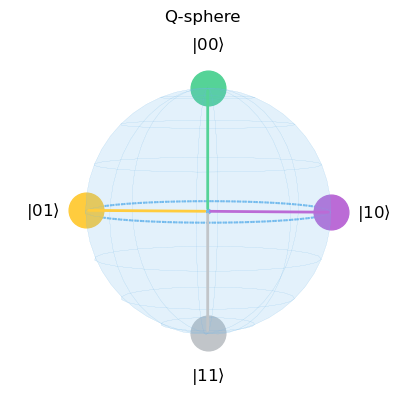

In [17]:
initial_state = 1/2*np.array([1j, -1j, -1, 1])

qc = QuantumCircuit(2)
qc.initialize(initial_state)
visualizer = QuantumVisualizer(qc)

visualizer.draw_qsphere()

### Exercise 5

Create a quantum circuit that generates this three-qubit circuit $ \ket{\Psi} = i\sqrt(0.5)\ket{000} - \sqrt(0.3)\ket{011} + \sqrt(0.2)\ket{11}$


Statevector:  [ 0.        +0.70710678j  0.        +0.j          0.        +0.j
 -0.54772256+0.j          0.        +0.j          0.        +0.j
  0.        +0.j          0.4472136 +0.j        ]


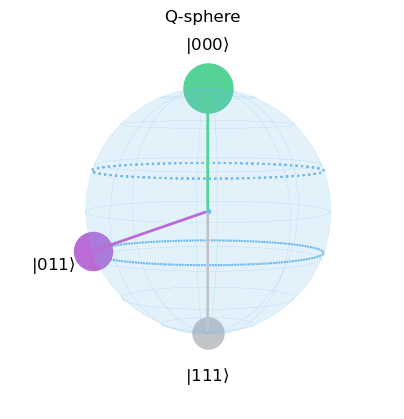

In [18]:
# Your code here
######################################### 
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

# Define the full 3-qubit statevector
# Order: |000⟩, |001⟩, |010⟩, |011⟩, |100⟩, |101⟩, |110⟩, |111⟩
initial_state = np.array([
    1j * np.sqrt(0.5),  # |000⟩
    0,                  # |001⟩
    0,                  # |010⟩
    -np.sqrt(0.3),      # |011⟩
    0,                  # |100⟩
    0,                  # |101⟩
    0,                  # |110⟩
    np.sqrt(0.2)        # |111⟩
])

# Create and initialize the circuit
qc = QuantumCircuit(3)
qc.initialize(initial_state)
#########################################
vector = Statevector(qc)
exercise2_5(vector)
print('Statevector: ', np.array(vector))
visualizer = QuantumVisualizer(qc)
visualizer.draw_qsphere()